## 1. Business Understanding

- Banking Dataset
- Direct Marketing Campaigns of Banking Institution
- Data for 2 years 45,211 rows orderred by date
- This dataset is publicly available for research
- By subscribing I am reffering to doing term deposits

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

# Define seed for repeatability
SEED = 42
np.random.seed(SEED)

In [2]:
df = pd.read_csv('train.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


####  Evaluate quality of the data, are there any null values to clean?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualize data

#### Univariate analysis of categorical features
* How many customers subscribe? 
* Looking into the customer's data (job, marital state, education, contact method

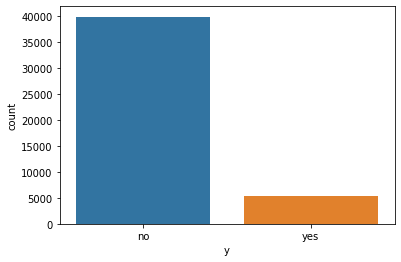

In [6]:
# How many people subscribe (a.k.a buy the bank's product, meaning doing term deposits.)
sns.countplot(x=df.y)
plt.show()

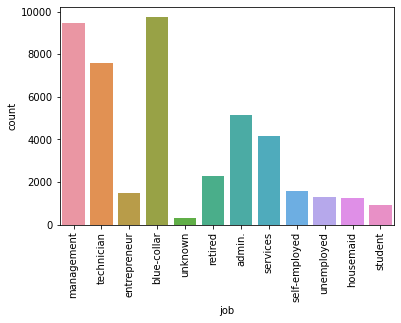

In [7]:
# Distribution of job feature

sns.countplot(x=df.job)
plt.xticks(rotation=90)
plt.show()

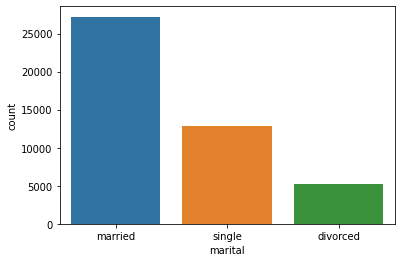

In [8]:
# Distribution of marital feature

sns.countplot(x=df.marital)
plt.show()

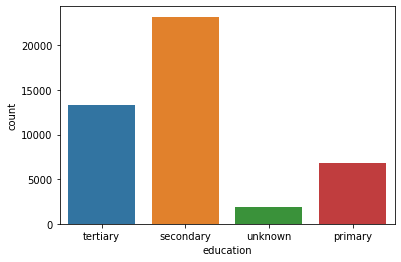

In [9]:
# Distribution of education feature

sns.countplot(x=df.education)
plt.show()

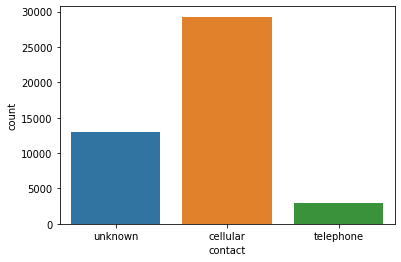

In [10]:
# Distribution of contact feature

sns.countplot(x=df.contact)
plt.show()

#### Bivariate analysis of Categorical features with target features.

#### Figuring out if there is any connection between age, balance, duration of campaign call with the outcome of the campaign. 

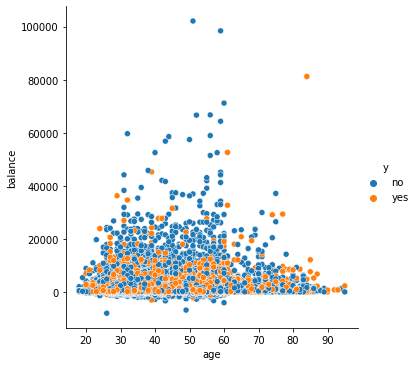

In [11]:
sns.relplot(x="age", y="balance", hue="y", data=df)

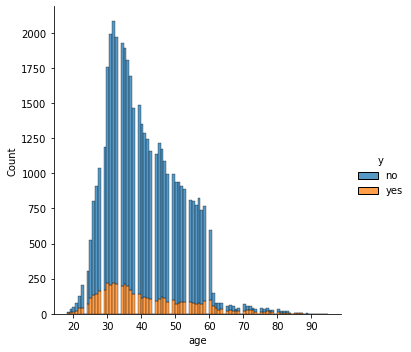

In [12]:
sns.displot(df, x="age", hue="y", multiple="stack")

#### The distribution plot above shows us that customers bellow 25 and above 60 are more likely to buy the product

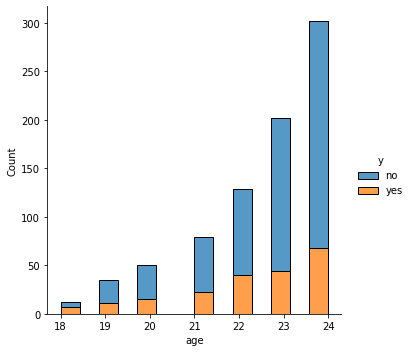

In [13]:
sns.displot(df[df['age'] < 25], x="age", hue="y", multiple="stack")

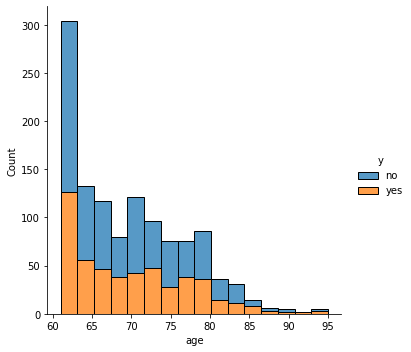

In [14]:
sns.displot(df[df['age'] > 60], x="age", hue="y", multiple="stack")

### What about the duration of a call during a campaign?

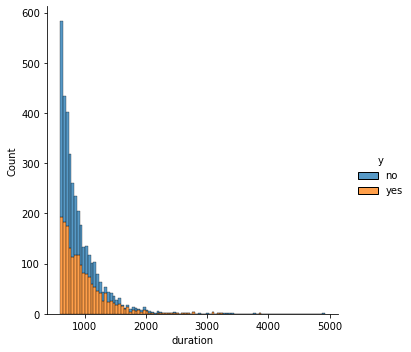

In [15]:
sns.displot(df[df['duration'] > 600], x='duration', hue='y', multiple='stack')

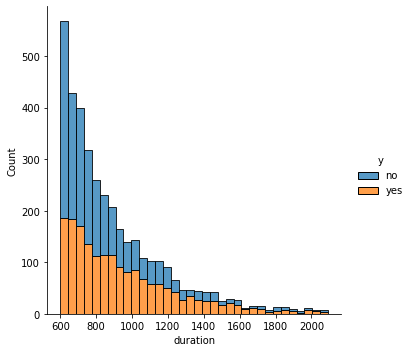

In [16]:
sns.displot(df[(df['duration'] > 600) & (df['duration'] < 2100)], x='duration', hue='y', multiple='stack')

#### Regarding the campaigns, the deciding factor seems to be perseverance. Here duration of communication is counted in seconds so between 10 to 30 minutes of communication the bank get's the most impressive results.

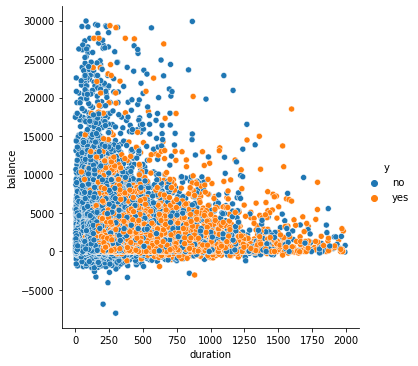

In [17]:
sns.relplot(x="duration",y='balance',hue="y", data=df[(df["balance"] < 30000) & (df['duration'] < 2000)]);

#### Customers with balance under 15k could be pursuaded with more campaign duration

#### What kind of jobs have the most potential to convert?

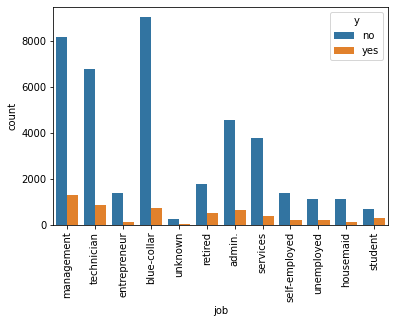

In [18]:
sns.countplot(x="job", hue="y", data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
convertingJobRatio = pd.DataFrame({'Job' : []})
for i in df['job'].unique():
    convertingJobRatio = convertingJobRatio.append(df[(df["job"] == i)]["y"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["y"].value_counts().sum())
convertingJobRatio["Job"] = df["job"].unique()
convertingJobRatio.sort_values(by='y', ascending=True)

,Job,y
no,student,71.321962
no,retired,77.208481
no,unemployed,84.497314
no,management,86.244449
no,admin.,87.797331
no,self-employed,88.157061
no,unknown,88.194444
no,technician,88.943004
no,services,91.116996
no,housemaid,91.209677


#### Students and retired customers came first and second with an impressive over 20% chance of converting in a campaign

<AxesSubplot:xlabel='marital', ylabel='count'>

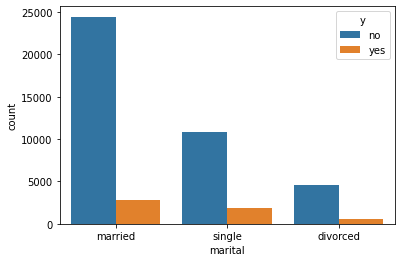

In [20]:
sns.countplot(x="marital", hue="y", data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

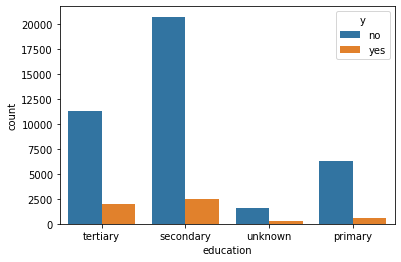

In [21]:
sns.countplot(x='education', hue='y', data=df)

<AxesSubplot:xlabel='contact', ylabel='count'>

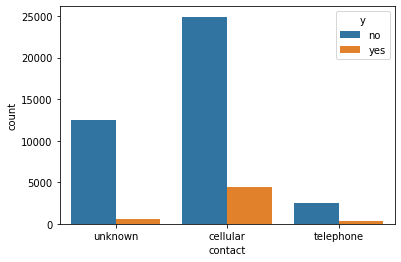

In [22]:
sns.countplot(x='contact', hue='y', data=df)

#### How many times if the bank contacting the customers in order to convert?

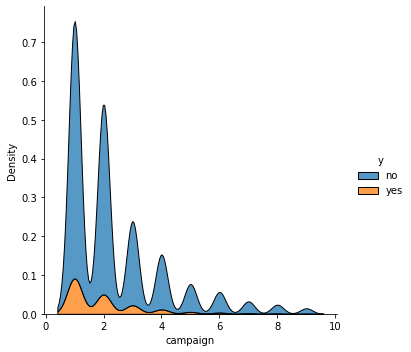

In [23]:
sns.displot(df[df['campaign'] < 10], x='campaign', hue='y', multiple='stack', kind='kde' )

In [24]:
df[df.y == 'yes'].campaign.value_counts()

1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
11      16
10      14
17       6
13       6
14       4
12       4
15       4
16       2
21       1
29       1
32       1
24       1
20       1
Name: campaign, dtype: int64

In [25]:
df[df.y == 'no'].campaign.value_counts()

1     14983
2     11104
3      4903
4      3205
5      1625
6      1199
7       688
8       508
9       306
10      252
11      185
12      151
13      127
14       89
15       80
16       77
17       63
18       51
19       44
20       42
21       34
22       23
23       22
25       22
24       19
28       16
29       15
26       13
31       12
27       10
30        8
32        8
33        6
34        5
36        4
35        4
43        3
38        3
50        2
41        2
37        2
51        1
46        1
44        1
55        1
39        1
58        1
63        1
Name: campaign, dtype: int64

#### We can clearly see that after the 5th time the numbers drop a lot, and after 10 times of communitation it does not even make sense. 

#### Based on all of the above the bank should narrow down:
* Job related: Students, retired customers, unemployed
* Campaigns: Customers are more likely to convert when the duration of the communication is between 10 to 30 minutes.
* Customers with balance under 15k
* Customers aging under 25 and over 60 are the ideal target.

## 3. Data Preparation

* In order to prepare the dataset to fit out model, I will convert the categorical values
* One hot encoding 
* Label encoding

In [26]:
# Create X_train dataframe

X_train = df.iloc[:, :-1]
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [27]:
# Create y_train dataframe

y_train = df[['y']]
y_train.head()

,y
0,no
1,no
2,no
3,no
4,no


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [29]:
# One-hot encoding
ohe_cols = list(X_train.select_dtypes(include='object').columns.values)

# I want to label encode education
le_col = ['education']

ohe_cols.remove('education')
ohe_cols

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [30]:
X_train = pd.get_dummies(X_train, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
X_train.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,2143,5,261,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,secondary,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,secondary,2,5,76,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,unknown,1506,5,92,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,unknown,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
# Perform label encoding on education:

ed_cat = {'unknown':0,
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
X_train['education'] = X_train['education'].replace(ed_cat)
X_train['education'].value_counts(normalize=True)

2    0.513194
3    0.294198
1    0.151534
0    0.041074
Name: education, dtype: float64

In [32]:
y_cat = {'no': 0, 
         'yes': 1}
y_train = y_train.replace(y_cat)
y_train.value_counts(normalize=True)

y
0    0.883015
1    0.116985
dtype: float64

In [33]:
# Load the test dataframe

test_df = pd.read_csv('test.csv', sep=';')
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [34]:
# Create the test_x dataframe
X_test = test_df.iloc[:, :-1]

# Create train_y dataframe
y_test = test_df[['y']]

# One-hot encode columns
X_test = pd.get_dummies(X_test, prefix=ohe_cols, columns=ohe_cols, drop_first=True)

# Label encode education
X_test['education'] = X_test['education'].replace(ed_cat)

# Encode target variable
y_test['y'] = y_test['y'].replace(y_cat)

<ipython-input-34-7fcf4570769a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['y'] = y_test['y'].replace(y_cat)


## 4. Modeling

### Decision Tree Classifier

In [35]:
dc = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=10,
                            random_state=SEED, class_weight="balanced")

In [36]:
# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(dc, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.07183365 0.15151515 0.27221172 0.57466919 0.39886578 0.52741021
 0.54442344 0.55198488 0.83931947 0.86200378]
0.48 recall with a standard deviation of 0.25


In [37]:
#Fit the model on the complete train dataset
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [38]:
# Get predictions on out train set
pred = dc.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

The train recall score is 0.96


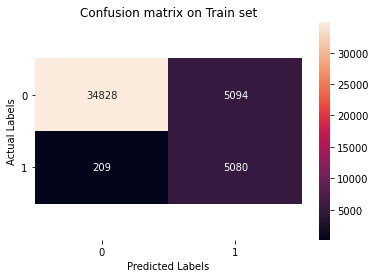

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     39922
           1       0.50      0.96      0.66      5289

    accuracy                           0.88     45211
   macro avg       0.75      0.92      0.79     45211
weighted avg       0.94      0.88      0.90     45211



In [39]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

print(classification_report(y_train, pred))

In [40]:
# Get predictions from the test dataset
pred = dc.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

The test recall score is 0.97


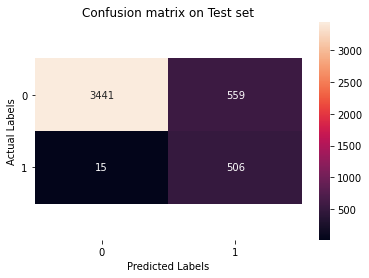

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      4000
           1       0.48      0.97      0.64       521

    accuracy                           0.87      4521
   macro avg       0.74      0.92      0.78      4521
weighted avg       0.94      0.87      0.89      4521



In [41]:
plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

### Random Forest Classifier

Cross validation scores: [0.00378072 0.         0.0094518  0.05860113 0.03780718 0.10396975
 0.17958412 0.08884688 0.3194707  0.82230624]
0.16 recall with a standard deviation of 0.24


<ipython-input-42-c1c82ff21248>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


The train recall score is 1.0


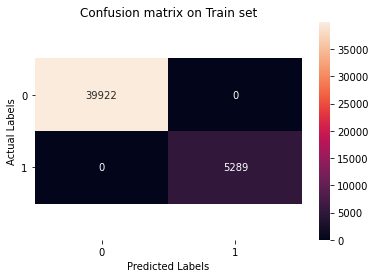

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211

The test recall score is 1.0


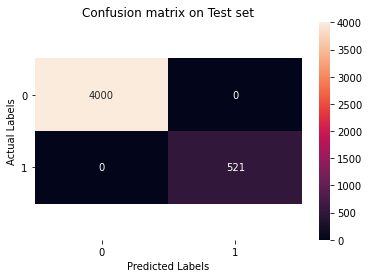

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [42]:
rf = RandomForestClassifier(n_jobs=-1, random_state=SEED, class_weight="balanced_subsample")

# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

# Fit the model on the complete train dataset
rf.fit(X_train, y_train)

# Get predictions from the train dataset
pred = rf.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_train, pred))

# Get predictions from the test dataset
pred = rf.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

#### We achieved a perfect classifier on our test set, with just one hot encoding and label encoding on our categorical values.